In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
meta = pd.read_csv("../../metadata/supp1_tab2.csv")
meta.columns

Index(['VBS_sample_id', 'contributor', 'country', 'location',
       'collection_year', 'collection_month', 'latitude', 'longitude',
       'date_of_collection', 'collection_context', 'collection_method',
       'collection_time', 'collector_sample_id', 'sample_type',
       'specimen_sex_partner', 'specimen_storage_partner', 'Lifestage',
       'dna_extraction_method_partner', 'sample_type_received',
       'body_part_lab', 'dna_extraction_method_lab', 'total_dna_lab',
       'species_pcr', 'sequencing_pipeline', 'mean_cov', 'median_cov',
       'modal_cov', 'mean_cov_2RL', 'median_cov_2RL', 'mode_cov_2RL',
       'mean_cov_3RL', 'median_cov_3RL', 'mode_cov_3RL', 'mean_cov_X',
       'median_cov_X', 'mode_cov_X', 'frac_gen_cov', 'divergence', 'pc_contam',
       'LLR', 'sex_call', 'PCA_QC_outlier', 'FILTER_frac_genome_cov',
       'FILTER_median_cov', 'FILTER_contamination', 'FILTER_nosexcall',
       'FILTER_divergence', 'FILTER_pca', 'sample_set', 'adm_level',
       'geographic_coh

In [3]:
cohorts = meta.geographic_cohort.unique()
cohorts

array(['Ghana_Northern-Region', 'Gabon_Haut-Ogooue', 'CAR_Ombella-MPoko',
       'Cameroon_Adamawa', 'Ghana_Ashanti-Region',
       'Malawi_Southern-Region', 'Mozambique_Maputo',
       'Uganda_Eastern-Region', 'Benin_Atlantique-Dept', 'DRC_Kinshasa',
       'Nigeria_Ogun-State', 'Zambia_Eastern-Prov', 'Kenya_Nyanza-Prov',
       'Kenya_Western-Prov', 'Tanzania_Morogoro-Region', 'DRC_Haut-Uele',
       'Mozambique_Cabo-Delgado'], dtype=object)

In [4]:
cohorts_ordered = ['Ghana_Northern-Region', 'Benin_Atlantique-Dept', 'Ghana_Ashanti-Region', 
                   'Nigeria_Ogun-State', 'Cameroon_Adamawa', 'CAR_Ombella-MPoko',
                   'DRC_Haut-Uele', 'Uganda_Eastern-Region', 'Kenya_Western-Prov', 
                   'Kenya_Nyanza-Prov', 'Gabon_Haut-Ogooue', 'DRC_Kinshasa',
                   'Tanzania_Morogoro-Region', 'Mozambique_Cabo-Delgado', 
                   'Zambia_Eastern-Prov', 'Malawi_Southern-Region', 'Mozambique_Maputo']

In [5]:
cohorts_downsampled = ['Ghana_Northern-Region', 'Benin_Atlantique-Dept', 'Ghana_Ashanti-Region', 
                   'Nigeria_Ogun-State', 'Cameroon_Adamawa', 
                   'DRC_Haut-Uele', 'Uganda_Eastern-Region', 
                   'Kenya_Nyanza-Prov', 'Gabon_Haut-Ogooue', 'DRC_Kinshasa',
                   'Mozambique_Cabo-Delgado', 
                   'Zambia_Eastern-Prov', 'Mozambique_Maputo']

In [6]:
x = meta[['geographic_cohort', 'geographic_cohort_colour']].drop_duplicates()
cdict = dict(zip(x.geographic_cohort, x.geographic_cohort_colour))
cdict

{'Ghana_Northern-Region': '#2ca02c',
 'Gabon_Haut-Ogooue': '#ff7f0e',
 'CAR_Ombella-MPoko': '#ff9896',
 'Cameroon_Adamawa': '#d62728',
 'Ghana_Ashanti-Region': '#2ca02c',
 'Malawi_Southern-Region': '#1f77b4',
 'Mozambique_Maputo': '#17becf',
 'Uganda_Eastern-Region': '#c5b0d5',
 'Benin_Atlantique-Dept': '#d1985a',
 'DRC_Kinshasa': '#e377c2',
 'Nigeria_Ogun-State': '#d2691e',
 'Zambia_Eastern-Prov': '#7bccc4',
 'Kenya_Nyanza-Prov': '#9467bd',
 'Kenya_Western-Prov': '#9467bd',
 'Tanzania_Morogoro-Region': '#aec7e8',
 'DRC_Haut-Uele': '#e377c2',
 'Mozambique_Cabo-Delgado': '#17becf'}

In [7]:
chrom = '2RL'
results2Rpi = []
results2Lpi = []
for cohort in cohorts_ordered:
    respi = np.load(f"pi/{chrom}_{cohort}_pi.npy")
    reswd = np.load(f"pi/{chrom}_{cohort}_windows.npy")
    results2Rpi.append(respi[reswd<=57335000])
    results2Lpi.append(respi[reswd>57335000])
        

In [8]:
chrom = '3RL'
results3RLpi = []
for cohort in cohorts_ordered:
    respi = np.load(f"diversity/20kb_hicov/{chrom}_{cohort}_pi.npy")
    results3RLpi.append(respi)

In [9]:
chrom = 'X'
resultsXpi = []
for cohort in cohorts_ordered:
    respi = np.load(f"diversity/20kb_hicov/{chrom}_{cohort}_pi.npy")
    resultsXpi.append(respi)

In [10]:
resultspi = [np.concatenate([i,j,k,l]) for i,j,k,l in zip(results2Rpi, results2Lpi, results3RLpi, resultsXpi)]
resultspi

[array([0.00441298, 0.00579526, 0.00515963, ..., 0.01891008, 0.02716351,
        0.03878216]),
 array([0.0042034 , 0.00487303, 0.00526406, ..., 0.00902167, 0.02410338,
        0.03298254]),
 array([0.00433652, 0.00570752, 0.00513259, ..., 0.01659015, 0.02732335,
        0.04240301]),
 array([0.00380247, 0.00526151, 0.00484648, ..., 0.02318182, 0.03041042,
        0.04486733]),
 array([0.00390812, 0.00498067, 0.00489993, ..., 0.01220212, 0.02717408,
        0.03783075]),
 array([0.00380816, 0.00513684, 0.00524842, ..., 0.01943816, 0.02901289,
        0.04786263]),
 array([0.00394569, 0.00513984, 0.0046709 , ..., 0.02460233, 0.03336221,
        0.0461376 ]),
 array([0.00350894, 0.00425183, 0.00433536, ..., 0.02037146, 0.02926338,
        0.04467132]),
 array([0.00293937, 0.00372237, 0.00405598, ..., 0.02516505, 0.03328831,
        0.0449906 ]),
 array([0.00336679, 0.00410926, 0.00442619, ..., 0.02060263, 0.02851563,
        0.04329763]),
 array([0.00369698, 0.00512114, 0.00469582, ..., 0

In [11]:
chrom = '2RL'
results2Rtd = []
results2Ltd = []
for cohort in cohorts_downsampled:
    respi = np.load(f"tajima_d/20kb_subset_3/{chrom}_{cohort}_tajima_d.npy")
    reswd = np.load(f"tajima_d/20kb_subset_3/{chrom}_{cohort}_windows.npy")
    results2Rtd.append(respi[reswd<=57335000])
    results2Ltd.append(respi[reswd>57335000])

In [12]:
chrom = '3RL'
results3RLtd = []
for cohort in cohorts_downsampled:
    respi = np.load(f"tajima_d/20kb_subset_3/{chrom}_{cohort}_tajima_d.npy")
    results3RLtd.append(respi)


In [13]:
chrom = 'X'
resultsXtd = []
for cohort in cohorts_downsampled:
    respi = np.load(f"tajima_d/20kb_subset_3/{chrom}_{cohort}_tajima_d.npy")
    resultsXtd.append(respi)

In [14]:
resultstd = [np.concatenate([i,j,k,l]) for i,j,k,l in zip(results2Rtd, results2Ltd, results3RLtd, resultsXtd)]
resultstd

[array([-1.89915777, -1.5887594 , -1.66386705, ..., -1.47463598,
        -0.43443864, -0.00772592]),
 array([-0.39158934, -0.44081778, -0.38216715, ..., -1.20998826,
        -0.61199574, -0.09848731]),
 array([-1.6431617 , -1.40703282, -1.49732082, ..., -1.86388153,
        -1.51504462, -0.96031437]),
 array([-1.34722679, -1.11860629, -1.22614095, ..., -1.62001809,
        -1.35027007, -0.71154713]),
 array([-1.4441084 , -1.17132044, -1.18815403, ..., -1.73175844,
        -1.27024231, -0.72987079]),
 array([-1.60198918, -1.32400979, -1.33132168, ..., -2.17651911,
        -1.64469997, -1.14800005]),
 array([-1.63958547, -1.579438  , -1.59015386, ..., -1.68426811,
        -1.32691727, -0.69377743]),
 array([-1.79535899, -1.64462954, -1.54546869, ..., -1.62757174,
        -1.32165335, -0.72804945]),
 array([ 1.17422764,  1.20358012,  0.95667867, ..., -0.92816915,
        -0.50638827,  0.93905228]),
 array([-0.30106524,  0.29417673,  0.12509068, ..., -0.46127327,
        -0.0181022 ,  0.92

In [15]:
cohort_abbreviations_dict = dict(zip(meta.geographic_cohort, meta.geographic_cohort_code))

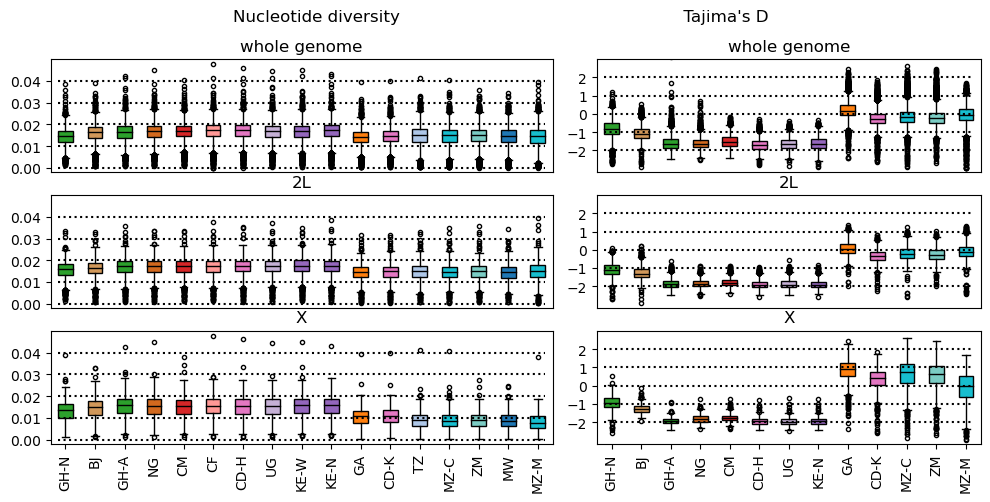

In [30]:
fig, ax = plt.subplots(3,2,figsize=(12,5), gridspec_kw={'width_ratios':[17,13], 'wspace':0.1})
piall = ax[0,0].boxplot(resultspi, sym='.', patch_artist=True)
pi2l = ax[1,0].boxplot(results2Lpi, sym='.', patch_artist=True)
pix = ax[2,0].boxplot(resultsXpi,sym='.',  patch_artist=True)
tdall = ax[0,1].boxplot(resultstd,sym='.',  patch_artist=True)
td2l = ax[1,1].boxplot(results2Ltd,sym='.',  patch_artist=True)
tdx = ax[2,1].boxplot(resultsXtd, sym='.', patch_artist=True)
for bplot, axx, name in zip([piall, pi2l, pix], 
                           ax[:,0], ['whole genome', '2L', 'X']):
    # fill with colors
    for patch, color in zip(bplot['boxes'], pd.Series(cohorts_ordered).map(cdict)):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('black')
    axx.set_xticks([])
    axx.set_title(f"{name}")
    axx.hlines([0, 0.01, 0.02, 0.03, 0.04], .75, 17.25, ls=':', color='k')
    axx.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
    axx.set_ylim(-0.002, 0.05)
    
ax[2,0].set_xticks(np.arange(1,18), pd.Series(cohorts_ordered).map(cohort_abbreviations_dict), rotation=90)

for bplot, axx, name in zip([tdall, td2l, tdx], 
                           ax[:,1], ['whole genome', '2L', 'X']):
    # fill with colors
    for patch, color in zip(bplot['boxes'], pd.Series(cohorts_downsampled).map(cdict)):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('black')
    axx.set_xticks([])
    axx.set_title(f"{name}")
    axx.hlines([0,-1, -2, 1, 2], .75, 13.25, ls=':', color='k')
    axx.set_yticks([-2,-1,0,1, 2])
    axx.set_ylim(-3.2,3)
    
ax[2,1].set_xticks(np.arange(1,14), pd.Series(cohorts_downsampled).map(cohort_abbreviations_dict), rotation=90)
fig.suptitle("Nucleotide diversity                                                      Tajima's D")

plt.savefig("pi_and_tD_with_fliers.svg")


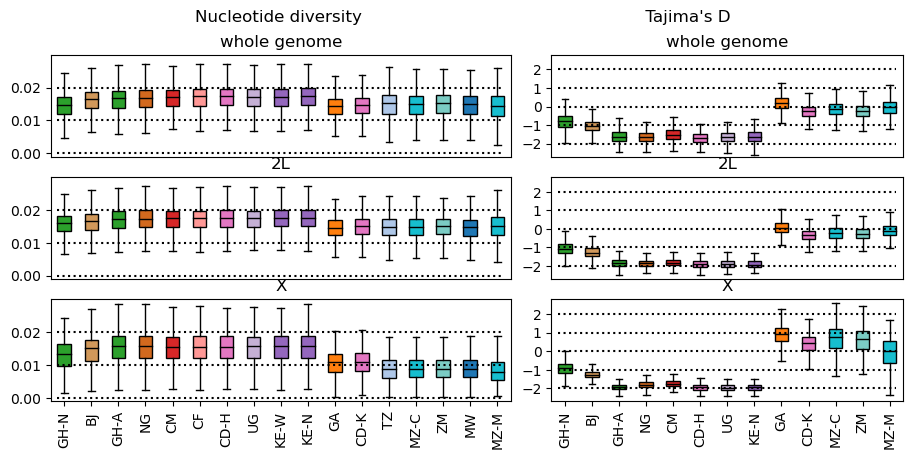

In [40]:
fig, ax = plt.subplots(3,2,figsize=(11,4.5), gridspec_kw={'width_ratios':[17,13], 'wspace':0.1})
piall = ax[0,0].boxplot(resultspi, showfliers=False, patch_artist=True)
pi2l = ax[1,0].boxplot(results2Lpi, showfliers=False, patch_artist=True)
pix = ax[2,0].boxplot(resultsXpi,showfliers=False,  patch_artist=True)
tdall = ax[0,1].boxplot(resultstd,showfliers=False, patch_artist=True)
td2l = ax[1,1].boxplot(results2Ltd,showfliers=False, patch_artist=True)
tdx = ax[2,1].boxplot(resultsXtd, showfliers=False, patch_artist=True)
for bplot, axx, name in zip([piall, pi2l, pix], 
                           ax[:,0], ['whole genome', '2L', 'X']):
    # fill with colors
    for patch, color in zip(bplot['boxes'], pd.Series(cohorts_ordered).map(cdict)):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('black')
    axx.set_xticks([])
    axx.set_title(f"{name}")
    axx.hlines([0, 0.01, 0.02], .75, 17.25, ls=':', color='k')
    axx.set_yticks([0, 0.01, 0.02])
    axx.set_ylim(-.001, 0.03)
    
ax[2,0].set_xticks(np.arange(1,18), pd.Series(cohorts_ordered).map(cohort_abbreviations_dict), rotation=90)

for bplot, axx, name in zip([tdall, td2l, tdx], 
                           ax[:,1], ['whole genome', '2L', 'X']):
    # fill with colors
    for patch, color in zip(bplot['boxes'], pd.Series(cohorts_downsampled).map(cdict)):
        patch.set_facecolor(color)
    for median in bplot['medians']:
        median.set_color('black')
    axx.set_xticks([])
    axx.set_title(f"{name}")
    axx.hlines([0,-1, -2, 1, 2], .75, 13.25, ls=':', color='k')
    axx.set_yticks([-2,-1,0,1,2])
    axx.set_ylim(-2.7,2.8)
    
ax[2,1].set_xticks(np.arange(1,14), pd.Series(cohorts_downsampled).map(cohort_abbreviations_dict), rotation=90)
fig.suptitle("Nucleotide diversity                                                      Tajima's D")

plt.savefig("pi_and_tD_without_fliers.svg")